In [43]:
#Problem
#A small but significant percentage of credit card transaction arre fraudelent, e. not authorized by the card holder
#This fraud results in billion of dollars of lossess each yer , reaulting  in hgher  fees to legitimate card holders
#Finding a credit card theives is a challenging problem for many reason. Lets see how machine learning can help???

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

# Credit Card Fraud detection::
The dataset cntains transsaction made by credit card in septmber 2013 by european card holders. Tis dataset represents the tansaction that ocuured in two days, where we have 492 cases of fraud out of 284807 transaactgion. The dataset is highly unbalanced , the positive class(known fraudelnet transaction )account by 0.172% of allml transaactions.

# an autoencoder is used as a unsupervised learning to identify irregularitiess tha might indicate the fraud. It is imperfect but works reaonablyy well.

In [18]:
# example of fraud are highly imbalanced .Maybe one out thosands are fraudelent. for this rreeason supervised
# lerning is not practical .
########### A more effective method is anomoy detection.Each of us has a certain purchasing pattern,e. What we buy, where we buy, how much we spend etc
## Iregularities and anomoly detction are the one way of detecting the fraud. 

In [23]:
cc=pd.read_csv('D:\ML\DS\\creditcard.csv')
pd.options.display.float_format = "{:.4f}".format
cc=cc.head(30000)
cc.shape

(30000, 31)

In [24]:
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


In [25]:
cc.describe

<bound method NDFrame.describe of             Time      V1      V2      V3      V4      V5      V6      V7  \
0         0.0000 -1.3598 -0.0728  2.5363  1.3782 -0.3383  0.4624  0.2396   
1         0.0000  1.1919  0.2662  0.1665  0.4482  0.0600 -0.0824 -0.0788   
2         1.0000 -1.3584 -1.3402  1.7732  0.3798 -0.5032  1.8005  0.7915   
3         1.0000 -0.9663 -0.1852  1.7930 -0.8633 -0.0103  1.2472  0.2376   
4         2.0000 -1.1582  0.8777  1.5487  0.4030 -0.4072  0.0959  0.5929   
...          ...     ...     ...     ...     ...     ...     ...     ...   
29995 35730.0000  1.2091  0.5836 -0.0308  2.3062  0.2867 -0.3641  0.3510   
29996 35730.0000 -0.5542  0.7262  1.4330  1.4501  0.6920  0.5152  0.6445   
29997 35730.0000  0.9925 -0.7533  1.1189  0.1961 -1.2494  0.2782 -0.8522   
29998 35731.0000 -1.0653  2.2261  1.0319  2.7651  0.4475  0.5558 -0.6058   
29999 35731.0000 -0.8322  0.7811  1.8100 -0.1599  0.2703  0.0474  0.9180   

           V8      V9  ...     V21     V22     V23   

In [26]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 31 columns):
Time      30000 non-null float64
V1        30000 non-null float64
V2        30000 non-null float64
V3        30000 non-null float64
V4        30000 non-null float64
V5        30000 non-null float64
V6        30000 non-null float64
V7        30000 non-null float64
V8        30000 non-null float64
V9        30000 non-null float64
V10       30000 non-null float64
V11       30000 non-null float64
V12       30000 non-null float64
V13       30000 non-null float64
V14       30000 non-null float64
V15       30000 non-null float64
V16       30000 non-null float64
V17       30000 non-null float64
V18       30000 non-null float64
V19       30000 non-null float64
V20       30000 non-null float64
V21       30000 non-null float64
V22       30000 non-null float64
V23       30000 non-null float64
V24       30000 non-null float64
V25       30000 non-null float64
V26       30000 non-null float64


In [29]:
print("shape:",cc.shape)

shape: (30000, 31)


In [30]:
print("columns::",cc.columns)

columns:: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [35]:
sc = StandardScaler()
X=cc.iloc[:,1:].values
X=sc.fit_transform(X)
print(X.shape)
print(X[0])

(30000, 30)
[-0.62410679 -0.12634219  1.12773934  0.82183286 -0.09457768  0.28350891
  0.27915456  0.05264095  0.01330462  0.17817133 -0.92000781  0.03772628
 -1.16911463 -0.53742276  1.46796619 -0.50489236  0.00838013  0.12389139
  0.54684984  0.31332628  0.01988255  0.62635276 -0.12719687  0.09775384
 -0.01015358 -0.41499245  0.31284751 -0.09451795  0.31325501 -0.05606409]


In [46]:
n_feature=X.shape[1]
print("n_feauture",n_feature)

n_feauture 30


In [49]:
import tensorflow as tf
adam = tf.keras.optimizers.Adam(learning_rate=0.0005)

i = Input(shape=(n_feature,))
x = Dense(64, activation="relu")(i)
x = Dense(32, activation="relu")(x)
x = Dense(64, activation="relu")(x)
o= Dense(n_feature)(x)


from tensorflow.keras.models import Model
model = Model(i,o)
model.compile(loss="mse", metrics=['accuracy'], optimizer=adam)
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                1984      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 30)                1950      
Total params: 8,126
Trainable params: 8,126
Non-trainable params: 0
_________________________________________________________________


In [50]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True
)
r = model.fit(X, X, epochs=200, batch_size=2064, verbose=1, validation_split=0.1, callbacks=[callback])

Train on 27000 samples, validate on 3000 samples
Epoch 1/200
27000/27000 [==============================] - 16s 596us/sample - loss: 1.0822 - accuracy: 0.0307 - val_loss: 0.8025 - val_accuracy: 0.0327
Epoch 2/200
27000/27000 [==============================] - 0s 9us/sample - loss: 0.9967 - accuracy: 0.0431 - val_loss: 0.7707 - val_accuracy: 0.0413
Epoch 3/200
27000/27000 [==============================] - 0s 5us/sample - loss: 0.9451 - accuracy: 0.0691 - val_loss: 0.7461 - val_accuracy: 0.0620
Epoch 4/200
27000/27000 [==============================] - 0s 4us/sample - loss: 0.8933 - accuracy: 0.1123 - val_loss: 0.7208 - val_accuracy: 0.0957
Epoch 5/200
27000/27000 [==============================] - 0s 6us/sample - loss: 0.8370 - accuracy: 0.1448 - val_loss: 0.6911 - val_accuracy: 0.1247
Epoch 6/200
27000/27000 [==============================] - 0s 6us/sample - loss: 0.7755 - accuracy: 0.1723 - val_loss: 0.6530 - val_accuracy: 0.1507
Epoch 7/200
27000/27000 [=============================

27000/27000 [==============================] - 0s 4us/sample - loss: 0.0384 - accuracy: 0.8377 - val_loss: 0.0375 - val_accuracy: 0.8277
Epoch 56/200
27000/27000 [==============================] - 0s 4us/sample - loss: 0.0373 - accuracy: 0.8411 - val_loss: 0.0363 - val_accuracy: 0.8340
Epoch 57/200
27000/27000 [==============================] - 0s 4us/sample - loss: 0.0362 - accuracy: 0.8426 - val_loss: 0.0356 - val_accuracy: 0.8333
Epoch 58/200
27000/27000 [==============================] - 0s 4us/sample - loss: 0.0355 - accuracy: 0.8452 - val_loss: 0.0345 - val_accuracy: 0.8403
Epoch 59/200
27000/27000 [==============================] - 0s 3us/sample - loss: 0.0342 - accuracy: 0.8486 - val_loss: 0.0336 - val_accuracy: 0.8360
Epoch 60/200
27000/27000 [==============================] - 0s 6us/sample - loss: 0.0339 - accuracy: 0.8484 - val_loss: 0.0327 - val_accuracy: 0.8440
Epoch 61/200
27000/27000 [==============================] - 0s 4us/sample - loss: 0.0324 - accuracy: 0.8535 - val

27000/27000 [==============================] - 0s 4us/sample - loss: 0.0122 - accuracy: 0.9136 - val_loss: 0.0120 - val_accuracy: 0.9137
Epoch 110/200
27000/27000 [==============================] - 0s 4us/sample - loss: 0.0118 - accuracy: 0.9145 - val_loss: 0.0118 - val_accuracy: 0.9127
Epoch 111/200
27000/27000 [==============================] - 0s 4us/sample - loss: 0.0114 - accuracy: 0.9158 - val_loss: 0.0115 - val_accuracy: 0.9150
Epoch 112/200
27000/27000 [==============================] - 0s 6us/sample - loss: 0.0112 - accuracy: 0.9170 - val_loss: 0.0114 - val_accuracy: 0.9140
Epoch 113/200
27000/27000 [==============================] - 0s 6us/sample - loss: 0.0112 - accuracy: 0.9153 - val_loss: 0.0115 - val_accuracy: 0.9073
Epoch 114/200
27000/27000 [==============================] - 0s 6us/sample - loss: 0.0112 - accuracy: 0.9160 - val_loss: 0.0114 - val_accuracy: 0.9153
Epoch 115/200
27000/27000 [==============================] - 0s 6us/sample - loss: 0.0108 - accuracy: 0.9165

27000/27000 [==============================] - 0s 4us/sample - loss: 0.0048 - accuracy: 0.9542 - val_loss: 0.0049 - val_accuracy: 0.9550
Epoch 164/200
27000/27000 [==============================] - 0s 4us/sample - loss: 0.0046 - accuracy: 0.9554 - val_loss: 0.0048 - val_accuracy: 0.9463
Epoch 165/200
27000/27000 [==============================] - 0s 4us/sample - loss: 0.0045 - accuracy: 0.9561 - val_loss: 0.0051 - val_accuracy: 0.9380
Epoch 166/200
27000/27000 [==============================] - 0s 4us/sample - loss: 0.0047 - accuracy: 0.9538 - val_loss: 0.0050 - val_accuracy: 0.9497
Epoch 167/200
27000/27000 [==============================] - 0s 4us/sample - loss: 0.0045 - accuracy: 0.9565 - val_loss: 0.0046 - val_accuracy: 0.9480
Epoch 168/200
27000/27000 [==============================] - 0s 4us/sample - loss: 0.0043 - accuracy: 0.9582 - val_loss: 0.0045 - val_accuracy: 0.9500
Epoch 169/200
27000/27000 [==============================] - 0s 4us/sample - loss: 0.0042 - accuracy: 0.9589

In [51]:
results = model.evaluate(X, X, batch_size=5, verbose=1)
print("Loss: %.2f" % results[0])
print("Acc: %.2f" % results[1])

30000/30000 [==============================] - 7s 226us/sample - loss: 0.0031 - accuracy: 0.9661
Loss: 0.00
Acc: 0.97


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


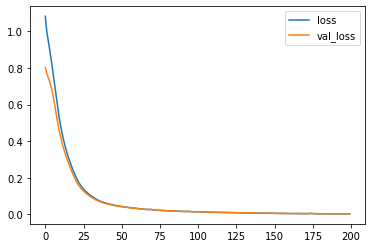

In [52]:

print(r.history.keys())
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()


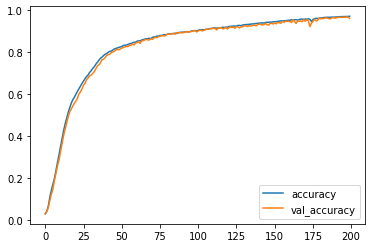

In [53]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [54]:
X_pred = model.predict(X)
mse = np.mean(np.power(X - X_pred, 2), axis=1)
mse

array([0.00069925, 0.00026997, 0.00140684, ..., 0.00051003, 0.00563697,
       0.00155542])

In [55]:
X_def = pd.DataFrame(X)

In [56]:
X_def['Loss_mae'] = mse

[(0, 0.2), (0, 0.1)]

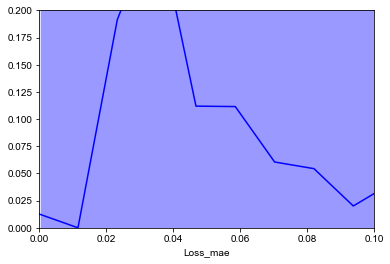

In [57]:
#plt.figure()
fig, ax = plt.subplots()
import seaborn as sns
sns.set(color_codes=True)
g = sns.distplot(X_def['Loss_mae'],
             bins = 1, 
             kde= True,
            color = 'blue')
g.set(xlim=(0,0.1),ylim=(0,0.2))

In [58]:
X_def['Loss_mae'].describe()

count   30000.0000
mean        0.0031
std         0.0242
min         0.0001
25%         0.0004
50%         0.0007
75%         0.0015
max         1.4915
Name: Loss_mae, dtype: float64

In [59]:
mode_loss = X_def['Loss_mae'].mode()[0]
print("Mode Loss: ", mode_loss)
mean_loss = X_def['Loss_mae'].mean()
print("Mean Loss: ", mean_loss)
data_plt = g.get_lines()[0].get_data()
elbow = np.amax(data_plt[1])
t_loss_index = np.where(data_plt[1] == elbow)
t_loss = data_plt[0][t_loss_index][0]
print("Threshold Loss: ", t_loss)

Mode Loss:  0.0008292858565205319
Mean Loss:  0.0030580121632764776
Threshold Loss:  0.035074666762725165


In [60]:
X_def['Fraud'] = X_def['Loss_mae'] > t_loss
X_def['Fraud'] = X_def['Fraud'].apply(lambda x: 1 if x else 0)

In [62]:
X_def['old_class'] = cc['Class']

In [63]:
X_def[X_def['Fraud'] != X_def['old_class']].head(50)

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,Loss_mae,Fraud,old_class
69,-0.9296,-0.6430,0.9935,1.2523,0.4383,-0.3548,0.4594,-0.4583,-0.7929,1.3234,...,0.8615,-1.1398,5.9572,-1.5511,-1.4664,-0.2015,-0.0561,0.0592,1,0
370,-0.6225,-0.0574,0.7165,-1.1853,-2.0610,1.2039,-3.7247,-5.8609,-1.2938,-0.8712,...,1.1153,2.2380,-0.2810,0.0803,0.8517,-0.1209,-0.0561,0.0422,1,0
401,-2.6879,-3.6086,1.4086,1.7247,1.5184,-0.7143,-0.1596,-0.8165,1.3028,1.0149,...,0.9548,2.0320,1.8878,1.6664,-5.9056,0.0231,-0.0561,0.0412,1,0
460,0.3860,0.5232,-0.9803,1.2905,-0.9183,-0.8247,-1.4502,0.3345,-1.1710,-1.6137,...,0.7955,0.9156,-0.9088,1.1570,0.7872,-0.3497,-0.0561,0.1659,1,0
472,-0.7171,0.8273,-0.8123,1.3836,-1.3639,-0.4469,-0.8486,0.7210,-1.7619,-1.9055,...,0.7526,0.1596,-0.6578,1.3282,0.7235,0.5576,-0.0561,0.0980,1,0
723,0.6916,-0.3802,0.7849,0.9231,-0.7640,0.7765,-0.9258,0.3877,-0.0780,0.5600,...,0.6930,-1.1421,6.0000,-0.3876,-0.0767,-0.3520,-0.0561,0.0781,1,0
1281,-1.4919,-2.8436,-1.0435,0.0921,-3.6083,1.3835,5.0233,-0.6146,-2.1529,-0.9825,...,0.2626,0.7584,0.2917,-1.5575,0.5389,7.4372,-0.0561,0.0351,1,0
1388,-2.0213,-2.4565,-1.3507,1.4715,-6.7335,4.8254,8.4529,-1.7064,-0.4658,-0.7720,...,0.4082,0.3854,2.2222,4.1582,-6.0114,10.6527,-0.0561,0.0511,1,0
1632,-5.9272,-6.3051,-8.1433,4.0893,-22.4947,16.1434,26.6840,-5.8812,-1.8090,-2.1880,...,1.4102,1.4075,1.5243,9.9048,15.1915,34.2756,-0.0561,0.0915,1,0
2464,-6.4842,-10.2689,-0.6815,2.5238,7.6630,-5.7238,-5.2607,1.2014,-0.2300,-0.2666,...,-0.1797,-1.0623,0.3976,0.4889,-8.6812,0.1802,-0.0561,0.1757,1,0


In [64]:
# predizioni errate classe esistente
X_def[X_def['old_class'] == 1]['Fraud'].value_counts()

1    88
0     6
Name: Fraud, dtype: int64

In [65]:
pd.crosstab(X_def['Fraud'], X_def['old_class'])

old_class,0,1
Fraud,,
0,29689,6
1,217,88


In [66]:
cm = pd.crosstab(X_def['Fraud'], X_def['old_class'])
true_pos = np.sum(np.diag(cm))
false_pos = cm[0][1]
false_neg = cm[1][0]
#tot = np.sum(np.sum(cm, axis=0))
precision = true_pos / (true_pos + false_pos) * 100
recall = true_pos / (true_pos + false_neg) * 100
f1 = 2 * (precision * recall) / (precision + recall)
print("Precision: %.3f%%" % (precision))
print("Recall: %.3f%%" % (recall))
print("F1: %.3f%%" % (f1))

Precision: 99.277%
Recall: 99.980%
F1: 99.627%
